In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, splitext, isdir, exists, basename
from collections import OrderedDict
import re
import os
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib as mpl

In [2]:
ROOT_DIR = os.path.dirname(os.path.abspath('.'))
df_full = pd.read_csv(r'C:\Users\Giobi\Tesi\processedData\txtfiles\df_info.csv')
df_full['Distribution'] = 'Full'

In [3]:
def from_txt_to_list(txt):
    out_list = []
    with open(txt) as f:
        for line in f:
            out_list.append(line.strip())
    return out_list
txtfiles_dir = os.path.join(ROOT_DIR, 'processedData', 'txtfiles')
txt_list_tr = os.path.join(txtfiles_dir, '{}-speakers-sampled.txt'.format('train'))
txt_list_val = os.path.join(txtfiles_dir, '{}-speakers-sampled.txt'.format('val'))
txt_list_test = os.path.join(txtfiles_dir, '{}-speakers.txt'.format('test'))
id_list_tr = from_txt_to_list(txt_list_tr)
id_list_val = from_txt_to_list(txt_list_val)
id_list_test = from_txt_to_list(txt_list_test)
regex = re.compile(r'(p)(\d*)')
id_tr = [regex.search(i)[2] for i in id_list_tr]
id_val = [regex.search(i)[2] for i in id_list_val]
id_test = [regex.search(i)[2] for i in id_list_test]
df_train = df_full[df_full['ID'].isin(id_tr)]
df_val = df_full[df_full['ID'].isin(id_val)]
df_test = df_full[df_full['ID'].isin(id_test)]
df_sampled = pd.concat([df_train, df_val, df_test], axis = 0)
df_sampled['Distribution'] = 'Sample'

### Analisi

Grafico distribuzione età 

Grafico percentuale accenti

In [175]:
print(df_full.ACCENTS.value_counts())
print('\n')
print(df_full.GENDER.value_counts())
print('\n')
print(df_train.GENDER.value_counts())
print('\n')
print(df_val.ACCENTS.value_counts())

English          33
American         22
Scottish         19
Irish             9
Canadian          8
NorthernIrish     6
SouthAfrican      4
Indian            3
Australian        2
Welsh             1
NewZealand        1
Name: ACCENTS, dtype: int64


F    61
M    47
Name: GENDER, dtype: int64


M    20
F    20
Name: GENDER, dtype: int64


English       2
American      1
NewZealand    1
Name: ACCENTS, dtype: int64


##### Spiegazione v plothttps://mode.com/blog/violin-plot-examples/

In [64]:
images_path = os.path.join(ROOT_DIR, 'altri file', 'thesis_latex', 'img')

In [177]:
#ax = sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)

In [178]:
df = pd.concat([df_sampled, df_full], axis = 0)

Image saved!


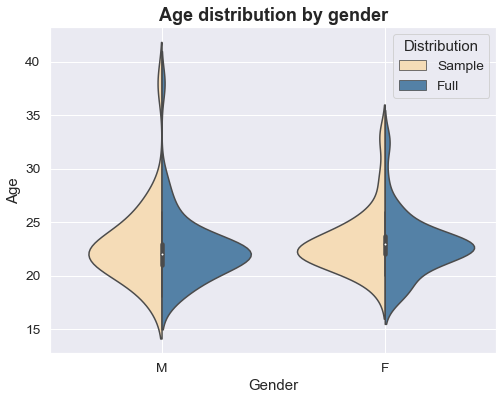

In [180]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.violinplot(x = 'GENDER', y="AGE", hue = 'Distribution', data=df, split=True, palette=["navajowhite", "steelblue"])
plt.title("Age distribution by gender", size = 'large', fontweight = 'bold')
ax.xaxis.grid(True)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.savefig(os.path.join(images_path, 'age_distribution_by_gender.png'), dpi=500)
print('Image saved!')
plt.show()

Image saved!


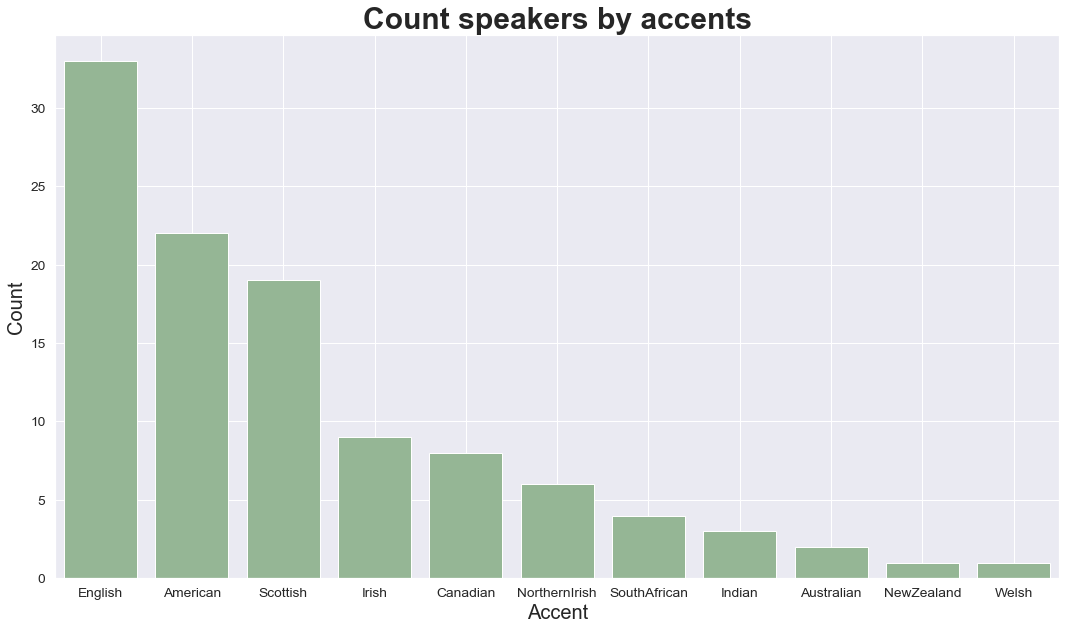

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.countplot(x="ACCENTS", data=df_full, color = 'darkseagreen', order = df['ACCENTS'].value_counts().index)
#sns.violinplot(x = 'GENDER', y="AGE", data=df, split=False, palette=["rosybrown", "lightblue"])
# legend_elements = [Patch(facecolor='rosybrown', edgecolor='black',
#                          label='F'),
#                     Patch(facecolor='lightblue', edgecolor='black',
#                          label='M')]
# plt.legend(handles=legend_elements)
plt.title("Count speakers by accents", size = 30, fontweight = 'bold')
ax.xaxis.grid(True)
plt.xlabel('Accent', size = 20)
plt.ylabel('Count', size = 20)
plt.savefig(os.path.join(images_path, 'count_speakers_by_accents.png'), dpi=500)
print('Image saved!')
plt.show()

# Results 

##### We use the Large Sample Approach for SNR and other metrics. (log-normal assumption) 

From "Confidence Intervals for the Signal-to-Noise Ratio and Difference of Signal-to-Noise Ratios of Log-Normal Distributions" (Warisa Thangjai, and Sa-Aat Niwitpong )

In [105]:
def add_numbers_over_bars(bar, minimum = True, first_bar = True, up = 0.1):
    if minimum:
        f = np.argmin
    else:
        f = np.argmax
    if first_bar:
        add = 0
    else:
        add = barWidth
    for index,data in enumerate(bar):
        if index == f(bar):
            fw = 'bold'
        else:
            fw = 'normal'
        plt.text(x=index - 0.085 + add, y = data+up , s=f"{data}", fontdict=dict(fontsize=20), fontweight=fw)

Image saved!


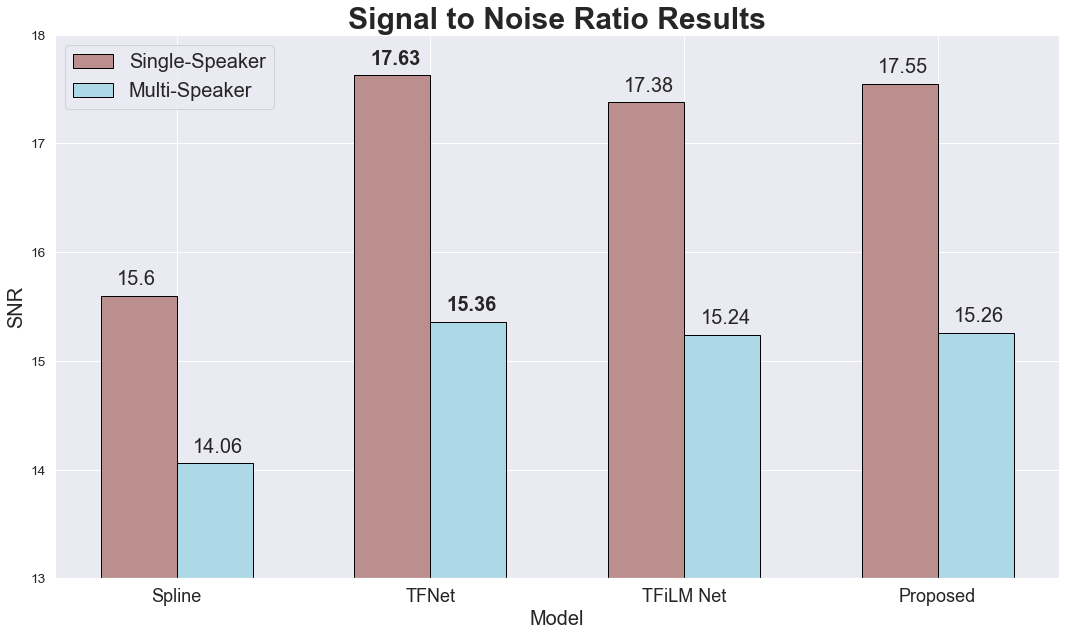

In [114]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

# width of the bars
barWidth = 0.3
 
# Single-Speaker
bars1 = [15.6, 17.63, 17.38, 17.55]
 
# Multi-Speaker
bars2 = [14.06, 15.36, 15.24, 15.26]
 
# Choose the height of the error bars (bars1)
yer1 = [0,0,0,0]
 
# Choose the height of the error bars (bars2)
yer2 = [0,0,0,0]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
ax.bar(r1, bars1, width = barWidth, color = "rosybrown", edgecolor = 'black', yerr=yer1, capsize=12, label='Single-Speaker')
 
# Create cyan bars
ax.bar(r2, bars2, width = barWidth, color = "lightblue", edgecolor = 'black', yerr=yer2, capsize=12, label='Multi-Speaker')
 
# general layout
ax.set_xticks(np.arange(4) + barWidth/2)#plt.xticks([r + barWidth for r in range(len(bars1))], ['Spline', 'TFNet', 'TFiLM Net', 'Proposed'])
ax.set_xticklabels(['Spline', 'TFNet', 'TFiLM Net', 'Proposed'], fontsize=18)
plt.title("Signal to Noise Ratio Results", size = 30, fontweight = 'bold')
ax.xaxis.grid(True)
ax.set_xlabel('Model', size = 20)
ax.set_ylabel('SNR', size = 20)
ax.set_ylim([13, 18])
ax.legend(prop={'size': 20})
add_numbers_over_bars(bars1, minimum = False)
add_numbers_over_bars(bars2, minimum = False, first_bar = False)
plt.savefig(os.path.join(images_path, 'snr_results.png'), dpi=500)
print('Image saved!')
plt.show()

Image saved!


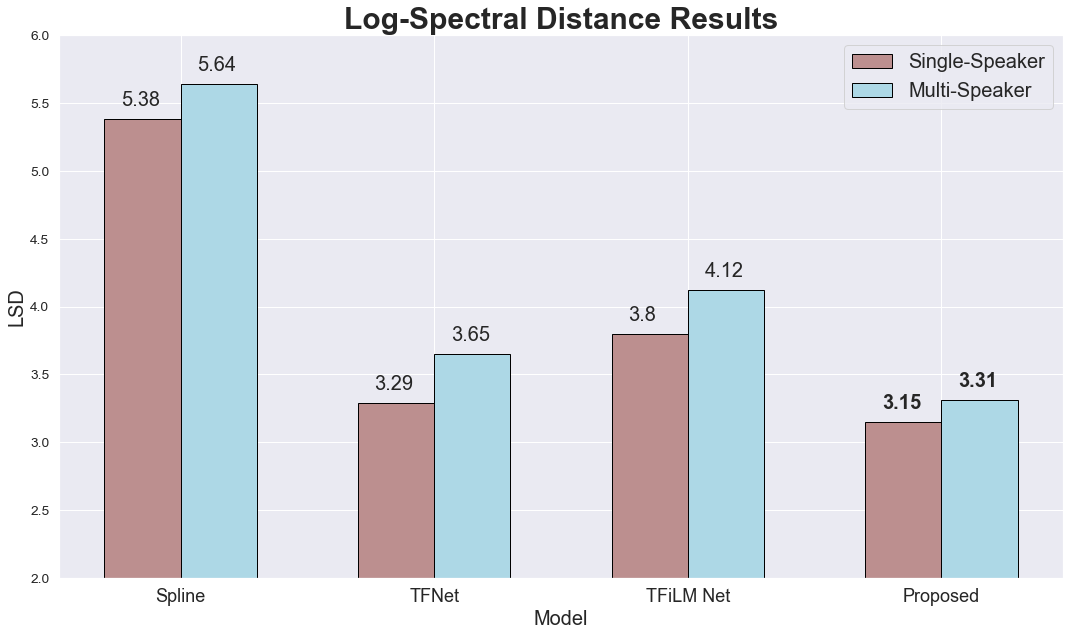

In [116]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

# width of the bars
barWidth = 0.3
 
# Single-Speaker
bars1 = [5.38, 3.29, 3.80, 3.15]
 
# Multi-Speaker
bars2 = [5.64, 3.65, 4.12, 3.31]
 
# Choose the height of the error bars (bars1)
yer1 = [0,0,0,0]
 
# Choose the height of the error bars (bars2)
yer2 = [0,0,0,0]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
ax.bar(r1, bars1, width = barWidth, color = "rosybrown", edgecolor = 'black', yerr=yer1, capsize=12, label='Single-Speaker')
 
# Create cyan bars
ax.bar(r2, bars2, width = barWidth, color = "lightblue", edgecolor = 'black', yerr=yer2, capsize=12, label='Multi-Speaker')
 
# general layout
ax.set_xticks(np.arange(4) + barWidth/2)#plt.xticks([r + barWidth for r in range(len(bars1))], ['Spline', 'TFNet', 'TFiLM Net', 'Proposed'])
ax.set_xticklabels(['Spline', 'TFNet', 'TFiLM Net', 'Proposed'], fontsize=18)
plt.title("Log-Spectral Distance Results", size = 30, fontweight = 'bold')
ax.xaxis.grid(True)
ax.set_xlabel('Model', size = 20)
ax.set_ylabel('LSD', size = 20)
ax.set_ylim([2, 6])
ax.legend(prop={'size': 20})
add_numbers_over_bars(bars1, minimum = True)
add_numbers_over_bars(bars2, first_bar = False)
plt.savefig(os.path.join(images_path, 'lsd_results.png'), dpi=500)
print('Image saved!')
plt.show()

Image saved!


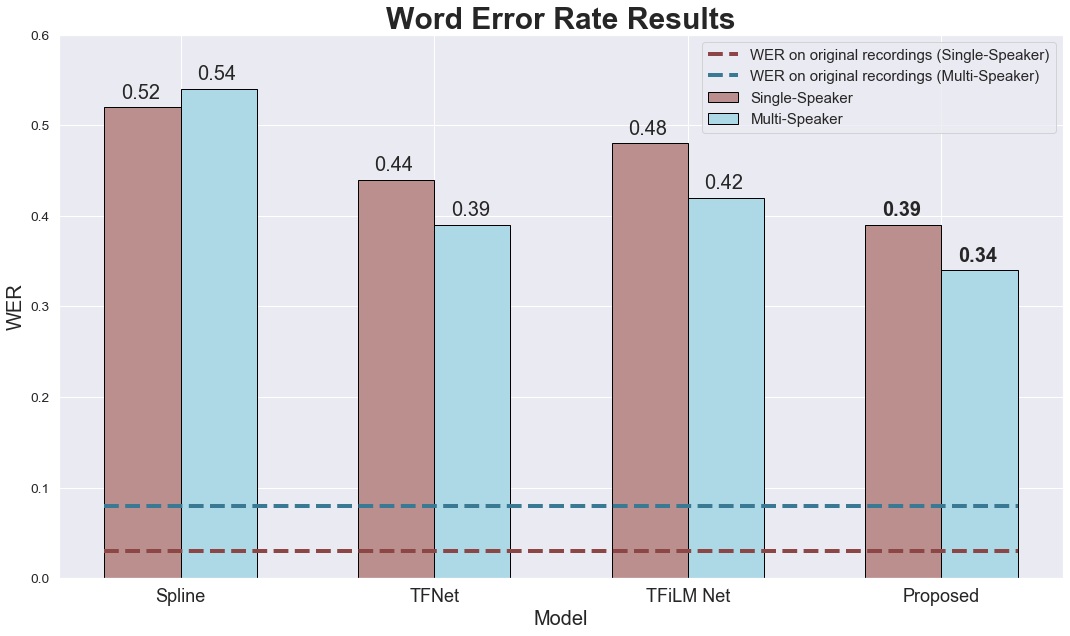

In [170]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

# width of the bars
barWidth = 0.3
 
# Single-Speaker
bars1 = [0.52, 0.44, 0.48, 0.39]
 
# Multi-Speaker
bars2 = [0.54, 0.39, 0.42, 0.34]
 
# Choose the height of the error bars (bars1)
yer1 = [0,0,0,0]
 
# Choose the height of the error bars (bars2)
yer2 = [0,0,0,0]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
ax.bar(r1, bars1, width = barWidth, color = "rosybrown", edgecolor = 'black', yerr=yer1, capsize=12, label='Single-Speaker')
 
# Create cyan bars
ax.bar(r2, bars2, width = barWidth, color = "lightblue", edgecolor = 'black', yerr=yer2, capsize=12, label='Multi-Speaker')
 
# general layout
ax.set_xticks(np.arange(4) + barWidth/2)#plt.xticks([r + barWidth for r in range(len(bars1))], ['Spline', 'TFNet', 'TFiLM Net', 'Proposed'])
ax.set_xticklabels(['Spline', 'TFNet', 'TFiLM Net', 'Proposed'], fontsize=18)
plt.title("Word Error Rate Results", size = 30, fontweight = 'bold')
ax.hlines(0.03, xmin=-0.15, xmax=3.45, colors = '#8D4646', lw=4, linestyles = '--', label='WER on original recordings (Single-Speaker)')   
ax.hlines(0.08, xmin=-0.15, xmax=3.45, colors = '#3A7994', lw=4, linestyles = '--', label='WER on original recordings (Multi-Speaker)')   
ax.xaxis.grid(True)
ax.set_xlabel('Model', size = 20)
ax.set_ylabel('WER', size = 20)
ax.set_ylim([0, .6])
ax.legend(prop={'size': 15})
add_numbers_over_bars(bars1, minimum = True, up = 0.01)
add_numbers_over_bars(bars2, first_bar = False, up = 0.01)
plt.savefig(os.path.join(images_path, 'wer_results.png'), dpi=500)
print('Image saved!')
plt.show()

### Weights distribution

In [5]:
w_dir = os.path.join(ROOT_DIR, 'processedData', 'multispeaker', 'weights_distribution_spectral_fusion_layer')

In [8]:
gionet_w = np.load(os.path.join(w_dir, 'gionet_weights.npy'))
tfnet_w = np.load(os.path.join(w_dir, 'tfnet_weights.npy'))

In [72]:
tfnet_w1 = 1-tfnet_w
tfnet_w1.mean()

0.5189256

In [74]:
gionet_w1 = 1-gionet_w
gionet_w1.mean()

0.90818113

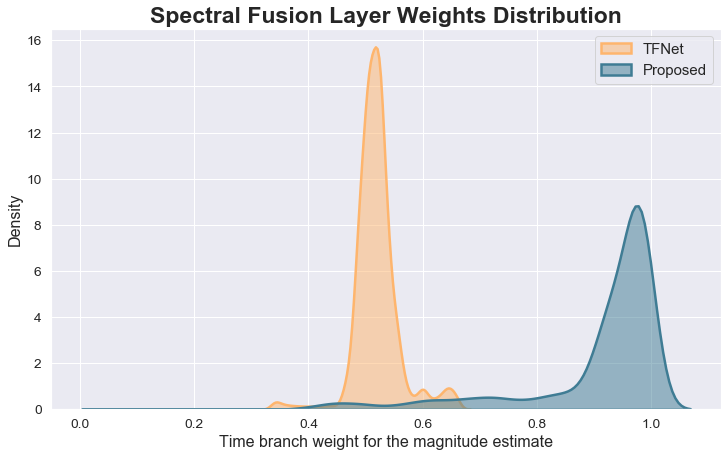

In [69]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
#ax.set_aspect("equal")
plt.title("Spectral Fusion Layer Weights Distribution", size = 23, fontweight = 'bold')

ax = sns.kdeplot(1-tfnet_w, 
                 fill=True, 
                 common_norm=False, 
                 palette="crest",
                 alpha=.5,
                 linewidth = 2.5,
                 color = '#feb56d',
                label = 'TFNet')
ax = sns.kdeplot(1-gionet_w, 
                 fill=True, 
                 common_norm=False, 
                 palette="crest",
                 alpha=.5,
                 linewidth = 2.5,
                 color = '#3f7c94',
                label = 'Proposed')

ax.set_xlabel('Time branch weight for the magnitude estimate', size = 16)
ax.set_ylabel('Density', size = 16)

ax.legend(prop={'size': 15})
#plt.savefig(os.path.join(images_path, 'weights_results.png'), dpi=500)